# What is Corona Virus(COVID-19)?
Coronavirus (COVID-19) is a highly contagious respiratory illness caused by a virus called SARS-CoV-2. It first emerged in Wuhan, China in December 2019 and has since become a global pandemic. COVID-19 spreads through respiratory droplets when an infected person talks, coughs, or sneezes. Symptoms include fever, cough, shortness of breath, fatigue, and loss of taste or smell. In severe cases, it can lead to pneumonia, acute respiratory distress syndrome, and even death. To slow the spread of COVID-19, governments and health organizations have implemented measures such as social distancing, wearing masks, and widespread vaccination.





In [1]:
import os

In [4]:
os.getcwd()

'C:\\Users\\Hi'

## Introduction:


###### The COVID-19 pandemic has caused widespread health and economic impacts across the world. Accurate prediction of the spread of COVID-19 is crucial in order to prepare and respond effectively to the pandemic. This project aims to utilize data science and machine learning techniques to predict the spread of COVID-19 based on various factors  Symptoms include fever, cough, shortness of breath headache ,and physical contact. The ultimate goal of this project is to provide valuable insights and support decision-making efforts in the ongoing fight against COVID-19.

###### Objective:
###### The objective of this project is to develop a machine learning model that can predict diseases with high accuracy using medical data such as demographic information, lab test results, and lifestyle factors.

### Data summary

The current dataset has been downloaded from a government website and contains around 2,78,848 individuals who have gone through the RT-PCR test. Data set contains 11 columns, including 8 features suspected to play an important role in the prediction of COVID19 outcome. Outcome variable is covid result test positive or negative.

#### Column descryption

This dataset has columns like: A. Basic information:

ID (Individual ID)

Sex (male/female).

Age ≥60 above years (true/false)

Test date (date when tested for COVID)

B. Symptoms:

Cough (true/false).

Fever (true/false).

Sore throat (true/false).

Shortness of breath (true/false).

Headache (true/false).

C. Other information:

Known contact with an individual confirmed to have COVID-19 (true/false).
D. Covid report

Corona positive or negative

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [4]:
Covid_test = pd.read_csv('corona_tested_006 (1).csv')
Covid_ = Covid_test.copy(deep = True)
Covid_.head(5)

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,TRUE,FALSE,TRUE,FALSE,FALSE,negative,None,None,Abroad
1,2,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
2,3,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
3,4,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Abroad
4,5,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Contact with confirmed


### Issues With the Data

In the given data, there are several issues that need to be addressed before it can be used for analysis and modeling:

-Data Consistency: The data for different symptoms (Cough_symptoms, Fever, Sore_throat, Shortness_of_breath, Headache, Age_60_above) are recorded in different ways. This needs to be standardized to ensure consistency in the data.

 - Missing Values: There are missing values in some columns represented as NAN. This needs to be handled to ensure that the data     is complete and ready for analysis.

 - Imbalanced Dataset: The outcome data is imbalanced, with more data points for one class than the other. This can result in      biased predictions and needs to be addressed by either oversampling the minority class or undersampling the majority class.

 - Categorical Data: Some of the data is categorical, which needs to be encoded for use in machine learning algorithms.
 
 - in outcome 3 classes are available which could create it multiclass problem.
 
These issues will need to be addressed before the data can be used for analysis and modeling.

#### Basic Exploration 

In [5]:
Covid_.shape

(278848, 11)

In [6]:
Covid_.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Ind_ID               278848 non-null  int64 
 1   Test_date            278848 non-null  object
 2   Cough_symptoms       278848 non-null  object
 3   Fever                278848 non-null  object
 4   Sore_throat          278848 non-null  object
 5   Shortness_of_breath  278848 non-null  object
 6   Headache             278848 non-null  object
 7   Corona               278848 non-null  object
 8   Age_60_above         278848 non-null  object
 9   Sex                  278848 non-null  object
 10  Known_contact        278848 non-null  object
dtypes: int64(1), object(10)
memory usage: 23.4+ MB


In [7]:
# changing date column into datetime datatype
Covid_['Test_date'] = pd.to_datetime(Covid_['Test_date'])

In [8]:
# column names
Covid_.columns

Index(['Ind_ID', 'Test_date', 'Cough_symptoms', 'Fever', 'Sore_throat',
       'Shortness_of_breath', 'Headache', 'Corona', 'Age_60_above', 'Sex',
       'Known_contact'],
      dtype='object')

In [9]:
#checking for duplicates
Covid_.duplicated().sum()

0

In [10]:
Covid_['Cough_symptoms'].unique()

array(['TRUE', 'FALSE', 'None', False, True], dtype=object)

In [11]:
Covid_['Fever'].unique()

array(['FALSE', 'TRUE', 'None', False, True], dtype=object)

In [12]:
Covid_['Sore_throat'].unique()

array(['TRUE', 'FALSE', 'None', False, True], dtype=object)

In [13]:
Covid_['Shortness_of_breath'].unique()

array(['FALSE', 'TRUE', 'None', False, True], dtype=object)

In [16]:
Covid_['Headache'].unique()

array(['FALSE', 'TRUE', 'None', False, True], dtype=object)

In [17]:
Covid_['Corona'].unique()

array(['negative', 'positive', 'other'], dtype=object)

In [18]:
Covid_['Age_60_above'].unique()

array(['None', 'No', 'Yes'], dtype=object)

In [19]:
Covid_['Sex'].unique()

array(['None', 'male', 'female'], dtype=object)

In [20]:
Covid_['Known_contact'].unique()

array(['Abroad', 'Contact with confirmed', 'Other'], dtype=object)

In [21]:
Covid_.nunique()

Ind_ID                 278848
Test_date                  51
Cough_symptoms              5
Fever                       5
Sore_throat                 5
Shortness_of_breath         5
Headache                    5
Corona                      3
Age_60_above                3
Sex                         3
Known_contact               3
dtype: int64

The challenge with this dataset is that the observations are quite messy and there are some missing values present. In order to clean the dataset, I need to change the "None" values to NaN and clarify the "false" and "False" values as Python treats them differently.

In [22]:
def replace_obs(x,y):
    Covid_['Cough_symptoms'].replace(x,y,inplace=True)
    
replace_obs('TRUE', True)
replace_obs('FALSE',False)
replace_obs('None',np.nan)
Covid_['Cough_symptoms'].unique() 

array([True, False, nan], dtype=object)

In [23]:
def replace_obs(x,y):
    Covid_['Fever'].replace(x,y,inplace=True)
    
replace_obs('TRUE', True)
replace_obs('FALSE',False)
replace_obs('None',np.nan)
Covid_['Fever'].unique() 

array([False, True, nan], dtype=object)

In [24]:
def replace_obs(x,y):
    Covid_['Sore_throat'].replace(x,y,inplace=True)
    
replace_obs('TRUE', True)
replace_obs('FALSE',False)
replace_obs('None',np.nan)
Covid_['Sore_throat'].unique() 

array([True, False, nan], dtype=object)

In [25]:
def replace_obs(x,y):
    Covid_['Shortness_of_breath'].replace(x,y,inplace=True)
    
replace_obs('TRUE', True)
replace_obs('FALSE',False)
replace_obs('None',np.nan)
Covid_['Shortness_of_breath'].unique() 

array([False, True, nan], dtype=object)

In [26]:
def replace_obs(x,y):
    Covid_['Headache'].replace(x,y,inplace=True)
    
replace_obs('TRUE', True)
replace_obs('FALSE',False)
replace_obs('None',np.nan)
Covid_['Headache'].unique() 

array([False, True, nan], dtype=object)

In [27]:
def replace_obs(x,y):
    Covid_['Age_60_above'].replace(x,y,inplace=True)
replace_obs('Yes', True)
replace_obs('No',False)
replace_obs('None',np.nan)
Covid_['Age_60_above'].unique()

array([nan, False, True], dtype=object)

In [28]:
Covid_['Sex'].replace('None',np.nan,inplace = True)
Covid_['Sex'].unique()

array([nan, 'male', 'female'], dtype=object)

In [29]:
Covid_.nunique()

Ind_ID                 278848
Test_date                  51
Cough_symptoms              2
Fever                       2
Sore_throat                 2
Shortness_of_breath         2
Headache                    2
Corona                      3
Age_60_above                2
Sex                         2
Known_contact               3
dtype: int64

In [30]:
#checking for the size of 'other' in known_contact column
contact = Covid_.groupby('Known_contact')
contact.size()

Known_contact
Abroad                     25468
Contact with confirmed     10639
Other                     242741
dtype: int64

In [31]:
Covid_.shape

(278848, 11)

In [32]:
#checking for the size of 'other' in corona column
corona1 = Covid_.groupby('Corona')
corona1.size()

Corona
negative    260227
other         3892
positive     14729
dtype: int64

In [33]:
#Checking for missing values
Covid_.isnull().sum()

Ind_ID                      0
Test_date                   0
Cough_symptoms            252
Fever                     252
Sore_throat                 1
Shortness_of_breath         1
Headache                    1
Corona                      0
Age_60_above           127320
Sex                     19563
Known_contact               0
dtype: int64

Age_60_above,Sex has more than 45% missing values which i should drop this column as this column has no significant effect on the outcome.

In [34]:
#setting index 
Covid_ = Covid_.set_index('Ind_ID')

In [35]:
Covid_ = Covid_[Covid_['Corona'] != 'other'] # drop the values other in Corona column

In [36]:
Covid_.shape

(274956, 10)

In [41]:
# droping age_60_above column as it has more than 45 % data is null
Covid_ = Covid_.drop(['Age_60_above'],axis = 1)

In [43]:
#just reordering the columns and not taking the date column
Covid_row = Covid_.iloc[:,[0,1,2,3,4,5,7,8,6]]

## Univariate Analysis

<AxesSubplot:ylabel='Cough_symptoms'>

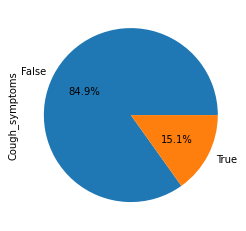

In [44]:
Covid_row['Cough_symptoms'].value_counts().plot(kind='pie',autopct='%0.1f%%')

<AxesSubplot:ylabel='Fever'>

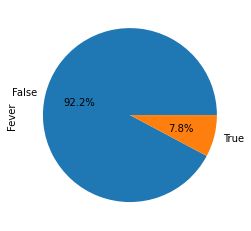

In [45]:
Covid_row['Fever'].value_counts().plot(kind='pie',autopct='%0.1f%%')

<AxesSubplot:ylabel='Sore_throat'>

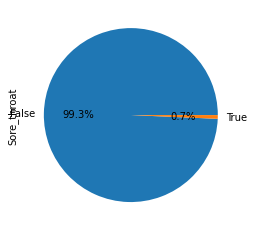

In [46]:
Covid_row['Sore_throat'].value_counts().plot(kind='pie',autopct='%0.1f%%')

<AxesSubplot:ylabel='Shortness_of_breath'>

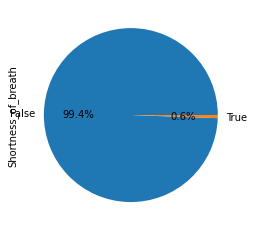

In [47]:
Covid_row['Shortness_of_breath'].value_counts().plot(kind='pie',autopct='%0.1f%%')

<AxesSubplot:ylabel='Headache'>

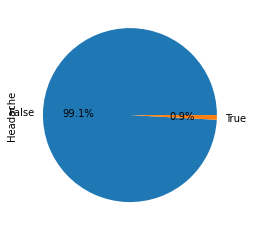

In [48]:
Covid_row['Headache'].value_counts().plot(kind='pie',autopct='%0.1f%%')

<AxesSubplot:ylabel='Corona'>

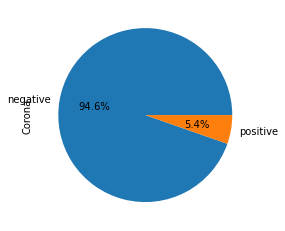

In [49]:
Covid_row['Corona'].value_counts().plot(kind='pie',autopct='%0.1f%%')

<AxesSubplot:ylabel='Sex'>

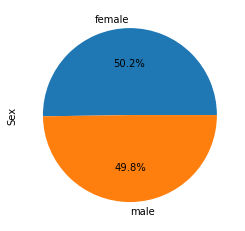

In [50]:
Covid_row['Sex'].value_counts().plot(kind='pie',autopct='%0.1f%%')

<AxesSubplot:ylabel='Known_contact'>

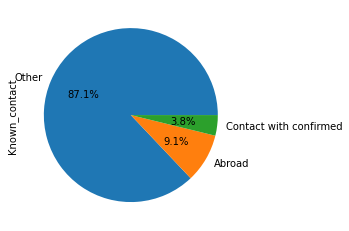

In [51]:
Covid_row['Known_contact'].value_counts().plot(kind='pie',autopct='%0.1f%%')

## Bivariate Ananlysis with target column

<AxesSubplot:xlabel='Cough_symptoms', ylabel='Corona'>

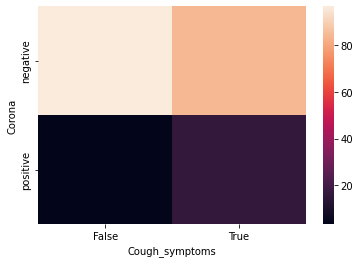

In [52]:
sns.heatmap(pd.crosstab(Covid_row['Corona'],Covid_row['Cough_symptoms'],normalize='columns')*100)

<AxesSubplot:xlabel='Fever', ylabel='Corona'>

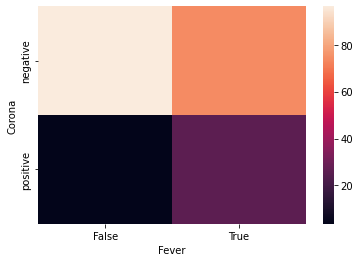

In [53]:
sns.heatmap(pd.crosstab(Covid_row['Corona'],Covid_row['Fever'],normalize='columns')*100)

<AxesSubplot:xlabel='Sore_throat', ylabel='Corona'>

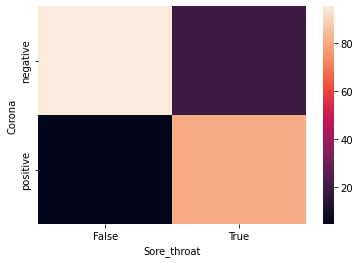

In [54]:
sns.heatmap(pd.crosstab(Covid_row['Corona'],Covid_row['Sore_throat'],normalize='columns')*100)

<AxesSubplot:xlabel='Shortness_of_breath', ylabel='Corona'>

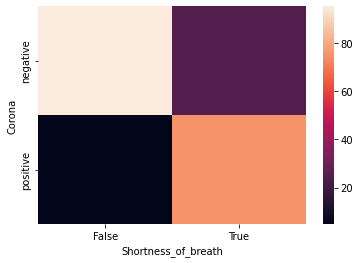

In [55]:
sns.heatmap(pd.crosstab(Covid_row['Corona'],Covid_row['Shortness_of_breath'],normalize='columns')*100)

<AxesSubplot:xlabel='Headache', ylabel='Corona'>

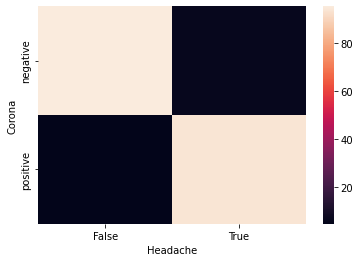

In [56]:
sns.heatmap(pd.crosstab(Covid_row['Corona'],Covid_row['Headache'],normalize='columns')*100)

<AxesSubplot:xlabel='Sex', ylabel='Corona'>

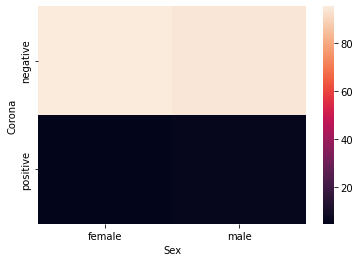

In [57]:
sns.heatmap(pd.crosstab(Covid_row['Corona'],Covid_row['Sex'],normalize='columns')*100)

<AxesSubplot:xlabel='Known_contact', ylabel='Corona'>

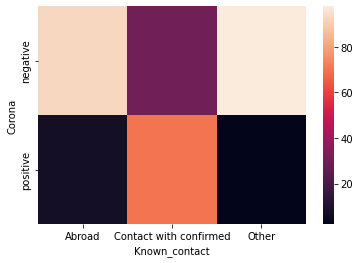

In [58]:
sns.heatmap(pd.crosstab(Covid_row['Corona'],Covid_row['Known_contact'],normalize='columns')*100)

### Dealing with missing data

In [76]:
Covid_test = Covid_row.copy(deep = True)

In [77]:
Covid_test.isnull().sum()

Test_date                  0
Cough_symptoms           252
Fever                    252
Sore_throat                1
Shortness_of_breath        1
Headache                   1
Sex                    19045
Known_contact              0
Corona                     0
dtype: int64

<AxesSubplot:>

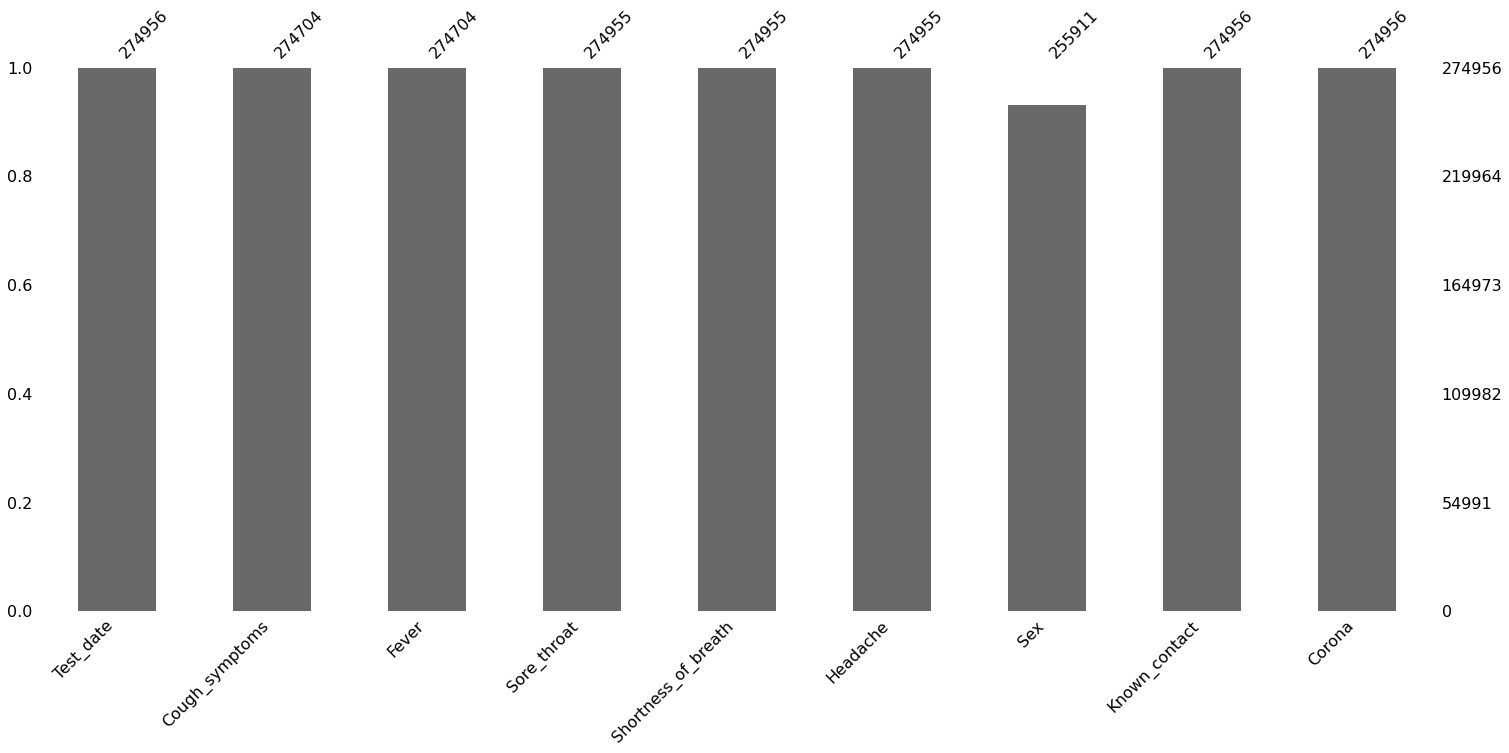

In [78]:
import missingno as msno # library to examine missing values
# creating bar plot to see the missing values
msno.bar(Covid_test)

<AxesSubplot:>

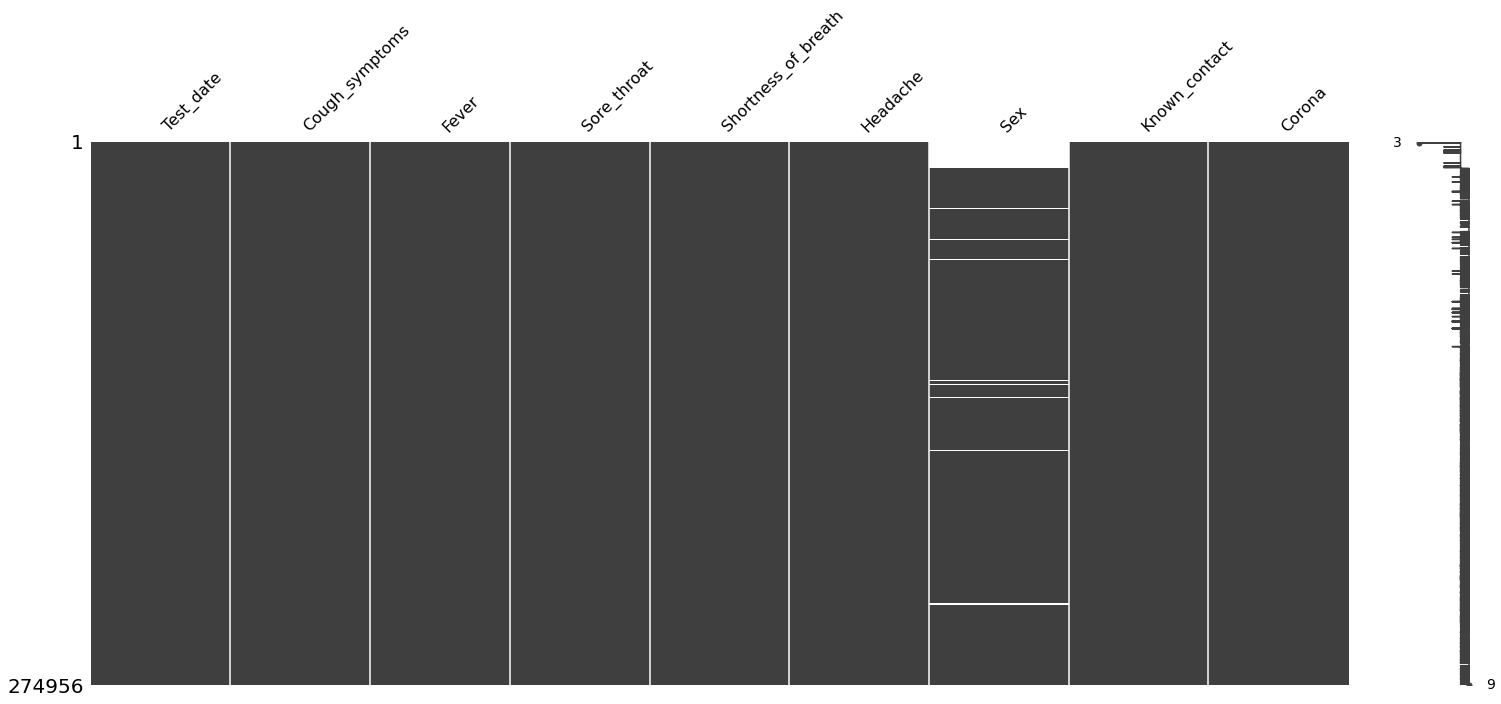

In [79]:
# creating matrix plot to see the pattern in missing values 
msno.matrix(Covid_test)

<AxesSubplot:>

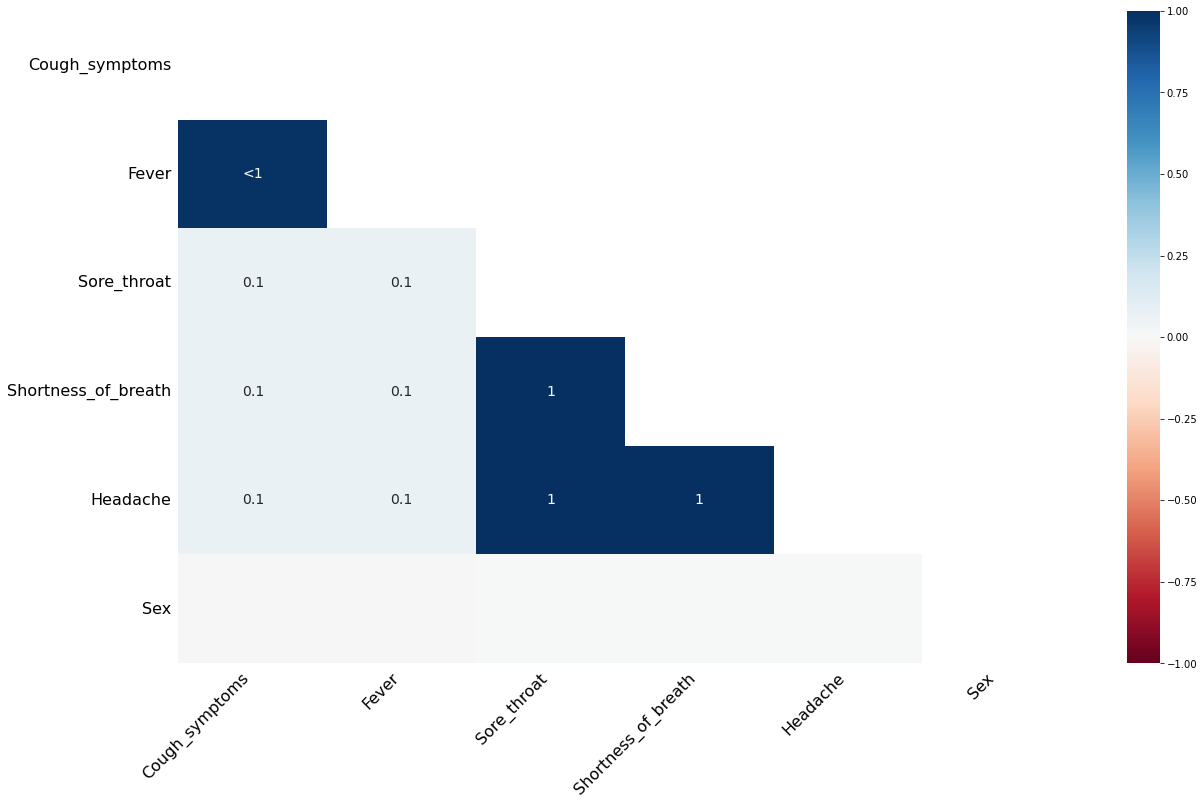

In [80]:
msno.heatmap(Covid_test)

Fever                 
Sore_throat           
Shortness_of_breath, 
Headache  are in correlation with Corona

In [81]:
Covid_test.isnull().sum()

Test_date                  0
Cough_symptoms           252
Fever                    252
Sore_throat                1
Shortness_of_breath        1
Headache                   1
Sex                    19045
Known_contact              0
Corona                     0
dtype: int64

In [230]:
#deleting the missing values with dropna
Covid_test.dropna(inplace = True)

In [231]:
Covid_test.isnull().sum() 

Test_date              0
Cough_symptoms         0
Fever                  0
Sore_throat            0
Shortness_of_breath    0
Headache               0
Sex                    0
Known_contact          0
Corona                 0
dtype: int64

## Feature Engineering and Selection 

In [232]:
Covid_Test1= Covid_test.copy(deep=True)

#### Dealing with Categorical Data

In [234]:
#label encoding on corona column
# Import label encoder
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'Corona'.
Covid_Test1['Corona']= label_encoder.fit_transform(Covid_Test1['Corona'])

In [235]:
# to do feature scaling
dummy_ = pd.get_dummies(Covid_Test1,columns= ['Sex','Known_contact'],drop_first = True)
dummy_= dummy_.iloc[:,[1,2,3,4,5,7,8,6]]

In [236]:
dummy_.head(2)

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Sex_male,Known_contact_Contact with confirmed,Corona
Ind_ID,,,,,,,,
13728,True,False,False,False,False,1,0,0
13729,True,False,False,False,False,0,0,0


### Feature selection

### chi2 test

In [237]:
import sklearn
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [238]:
# Split the data into features and target
X = dummy_.iloc[:, :-1]
y = dummy_.iloc[:, -1]


In [239]:
X.head(2)

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Sex_male,Known_contact_Contact with confirmed
Ind_ID,,,,,,,
13728,True,False,False,False,False,1,0
13729,True,False,False,False,False,0,0


In [240]:
sklearn.feature_selection.chi2(X, y)

(array([ 8161.47000721, 15989.97741346, 21842.25009598, 15729.73264397,
        34018.17312388,    93.34520088, 83254.65479038]),
 array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 4.39245332e-22, 0.00000000e+00]))

As I can see that p value  for  Sex_male column  is greter and so that it is least effective for the outcome so will do not consider these for model eveluation.

In [241]:
Covid4 =Covid_Test1.copy(deep = True)

In [242]:
Covid4 =Covid4.drop(['Sex'],axis = 1)

In [243]:
Covid4.head(2)

,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Known_contact,Corona
Ind_ID,,,,,,,,
13728,2020-03-22,True,False,False,False,False,Abroad,0
13729,2020-03-22,True,False,False,False,False,Abroad,0


## Model Training ,Evaluation,Selection

In [244]:
X = Covid4.iloc[:, [1,2,3,4,5,6]]
Y = Covid4.iloc[:, -1]

In [245]:
X.head(2)

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Known_contact
Ind_ID,,,,,,
13728,True,False,False,False,False,Abroad
13729,True,False,False,False,False,Abroad


In [246]:
Y

Ind_ID
13728     0
13729     0
13731     1
13735     0
13736     0
         ..
278844    1
278845    0
278846    0
278847    0
278848    0
Name: Corona, Length: 255668, dtype: int32

In [247]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=101)

In [248]:
### both will have same shape
X_train.shape, Y_train.shape

((191751, 6), (191751,))

In [249]:
Y_train.value_counts() # highly imbalance data

0    181574
1     10177
Name: Corona, dtype: int64

In [250]:
Y_test.value_counts()

0    60562
1     3355
Name: Corona, dtype: int64

### One Hot Encoding

In [251]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore',sparse=False, dtype =np.int32,drop = 'first')

In [256]:
X_train['Known_contact'] = ohe.fit_transform(X_train[['Known_contact']])

In [258]:
X_test['Known_contact'] = ohe.fit_transform(X_test[['Known_contact']])

In [259]:
### both will have same shape
X_train.shape, Y_train.shape

((191751, 6), (191751,))

In [260]:
### both will have same shape
X_test.shape, Y_test.shape

((63917, 6), (63917,))

In [261]:
Y_train.value_counts()

0    181574
1     10177
Name: Corona, dtype: int64

### Balancing the Dataset with undersampling technique

In [262]:
import imblearn
from imblearn.under_sampling import RandomUnderSampler

In [263]:
rus = RandomUnderSampler()
X_resampled, y_resampled = rus.fit_resample(X_train, Y_train)

In [264]:
y_resampled.value_counts()

0    10177
1    10177
Name: Corona, dtype: int64

## RandomForest

In [265]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

In [266]:
X_resampled

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Known_contact
0,False,False,False,False,False,0
1,False,False,False,False,False,0
2,False,False,False,False,False,0
3,False,False,False,False,False,0
4,False,False,False,False,False,0
...,...,...,...,...,...,...
20349,False,False,False,False,False,1
20350,True,False,False,False,False,0
20351,True,False,False,False,False,1
20352,True,False,False,True,True,1


In [267]:
# specify the hyperparameters to be tuned
param_grid = {'n_estimators': [10, 50, 100], 'max_depth': [5, 10, 20]}

# create a Random Forest classifier
rf = RandomForestClassifier()

# perform grid search with cross-validation
grid_search1 = GridSearchCV(rf, param_grid, cv=5)
grid_search1.fit(X_resampled, y_resampled)
# print the best parameters and score
print("Best parameters: ", grid_search1.best_params_)
print("Best score: ", grid_search1.best_score_)

Best parameters:  {'max_depth': 5, 'n_estimators': 50}
Best score:  0.8427827197466107


In [268]:
# make predictions on the test set
y_pred = grid_search1.predict(X_test)

In [269]:
# generate the classification report
report = classification_report(Y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.93      0.96     60562
           1       0.38      0.76      0.51      3355

    accuracy                           0.92     63917
   macro avg       0.68      0.85      0.73     63917
weighted avg       0.95      0.92      0.93     63917



## Decision Tree

In [270]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [271]:
# Define the range of hyperparameters to be searched
param_grid = {
    "max_depth": np.arange(1, 20),
    "min_samples_leaf": [1, 5, 10, 20],
    "criterion": ["gini", "entropy"]
}

# Create a decision tree classifier
dt = DecisionTreeClassifier()

# Use GridSearchCV to search for the best hyperparameters
grid_search = GridSearchCV(dt, param_grid, cv=5)
grid_search.fit(X_resampled, y_resampled)

# Get the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

Best hyperparameters: {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 1}


In [272]:
# make predictions on the test set
y_pred2 = grid_search.predict(X_test)

In [273]:
# generate the classification report
report = classification_report(Y_test, y_pred2)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.93      0.96     60562
           1       0.38      0.76      0.51      3355

    accuracy                           0.92     63917
   macro avg       0.68      0.85      0.73     63917
weighted avg       0.95      0.92      0.93     63917



## kNN

In [274]:
from sklearn.neighbors import KNeighborsClassifier 

In [275]:
# create a KNN model
knn = KNeighborsClassifier()

In [276]:
# define the parameter grid for hyperparameter tuning
param_grid = {'n_neighbors': np.arange(1, 50),
              'weights': ['uniform', 'distance']}

# create a grid search object
grid_search = GridSearchCV(knn, param_grid, cv=5)

# perform the grid search
grid_search.fit(X_resampled, y_resampled)

# print the best parameters and score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)


Best parameters:  {'n_neighbors': 45, 'weights': 'distance'}
Best score:  0.7502219510325627


In [277]:
# make predictions on the test set
y_pred = grid_search.predict(X_test)

# generate the classification report
report = classification_report(Y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98     60562
           1       0.87      0.37      0.52      3355

    accuracy                           0.96     63917
   macro avg       0.92      0.68      0.75     63917
weighted avg       0.96      0.96      0.96     63917



## Conclusion:

Precision measures the percentage of correct positive predictions among all positive predictions. Recall measures the percentage of correct positive predictions among all actual positive instances. F1-score is the harmonic mean of precision and recall.

The KNN model has precision of 0.97 for class 0 (covid_negetive), recall of 0.37 for class 1 (covid_positive), and an overall weighted average f1-score of 0.96. The Decision Tree and random forest model both has same precision of 0.38 for class 1 (covid_positive), recall of 0.76 for class 1, and an overall weighted average f1-score of 0.93. 

#### 
 - KNN worked well over Random forest and Decision tree
 - for balancing the data undersampled technique is good 
 - for categorical data used one hot encoding 
 - for feature selection chi^2 test is used
 - missing values was round 7% so simply i droped these values as data was alreddy big.


## SQL Queries

In [171]:
#!pip install pandas
!pip install pandasql

In [173]:
Covid_Test1.head(2)

,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Sex,Known_contact,Corona
Ind_ID,,,,,,,,,
13728,2020-03-22,True,False,False,False,False,male,Abroad,0
13729,2020-03-22,True,False,False,False,False,female,Abroad,0


In [278]:
from pandasql import sqldf

In [279]:
mysql = lambda q: sqldf(q, globals())

##### Find the number of corona patients who faced shortness of breath.

In [280]:
mysql("""SELECT count(*) FROM Covid_Test1 WHERE Shortness_of_breath = True and Corona  = 1""")

,count(*)
0,979


#### Find the number of negative corona patients who have fever and sore_throat. 

In [281]:
mysql(""" SELECT COUNT(*)
FROM Covid_Test1
WHERE Corona = 0 AND Fever = True AND Sore_throat = True""")

,COUNT(*)
0,50


#### Group the data by month and rank the number of positive cases.

In [296]:
mysql("""SELECT strftime('%Y-%m', Test_date) AS Month, 
       COUNT(*) AS Positive_Cases
FROM Covid_Test1
WHERE Corona = 1
GROUP BY Month
ORDER BY Positive_Cases DESC""")

,Month,Positive_Cases
0,2020-03,5260
1,2020-04,4116
2,2020-01,677
3,2020-02,614
4,2020-05,505
5,2020-07,479
6,2020-06,392
7,2020-10,356
8,2020-11,289
9,2020-09,287


#### Find the female negative corona patients who faced cough and headache.

In [104]:
mysql(""" SELECT * FROM Covid_Test1
WHERE Corona = 0 AND Sex = 'female' AND Cough_symptoms= True AND Headache = True""")

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Sex,Known_contact,Corona
0,13756,2020-03-22 00:00:00.000000,1,1,1,0,1,female,Abroad,0
1,17289,2020-03-22 00:00:00.000000,1,1,1,0,1,female,Abroad,0
2,17657,2020-03-23 00:00:00.000000,1,0,1,0,1,female,Abroad,0
3,19554,2020-03-23 00:00:00.000000,1,1,0,0,1,female,Other,0
4,19615,2020-03-23 00:00:00.000000,1,0,1,1,1,female,Contact with confirmed,0
5,20248,2020-03-23 00:00:00.000000,1,1,0,0,1,female,Abroad,0
6,20253,2020-03-23 00:00:00.000000,1,1,0,0,1,female,Contact with confirmed,0
7,37904,2020-03-27 00:00:00.000000,1,1,1,1,1,female,Contact with confirmed,0
8,40616,2020-03-27 00:00:00.000000,1,0,0,1,1,female,Contact with confirmed,0
9,40752,2020-03-27 00:00:00.000000,1,1,0,0,1,female,Contact with confirmed,0


#### How many elderly corona patients have faced breathing problems?

In [ ]:
column is not available 

#### Which three symptoms were more common among COVID positive patients?

In [307]:
mysql("""WITH CTE AS (
  SELECT Cough_symptoms, Fever, Sore_throat, Shortness_of_breath, Headache,
         COUNT(*) AS Total_Count
  FROM Covid_Test1
  WHERE Corona = 1
  GROUP BY Cough_symptoms, Fever, Sore_throat, Shortness_of_breath, Headache
)
SELECT Cough_symptoms, Fever, Sore_throat, Shortness_of_breath, Headache, Total_Count
FROM CTE
ORDER BY Total_Count DESC
LIMIT 3""")

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Total_Count
0,0,0,0,0,0,4909
1,1,0,0,0,0,2041
2,1,1,0,0,0,1997


#### Which symptom was less common among COVID negative people?

In [308]:
mysql("""SELECT
  SUM(CASE WHEN Cough_symptoms = True THEN 1 ELSE 0 END) AS Cough,
  SUM(CASE WHEN Fever = True THEN 1 ELSE 0 END) AS Fever,
  SUM(CASE WHEN Sore_throat = True THEN 1 ELSE 0 END) AS Sore_Throat,
  SUM(CASE WHEN Shortness_of_breath = True THEN 1 ELSE 0 END) AS Shortness_of_Breath,
  SUM(CASE WHEN Headache = True THEN 1 ELSE 0 END) AS Headache
FROM
  Covid_Test1
WHERE
  Corona = 0
ORDER BY
  Cough, Fever, Sore_Throat, Shortness_of_Breath, Headache 
DESC""")

,Cough,Fever,Sore_Throat,Shortness_of_Breath,Headache
0,32988,14814,137,99,98


#### What are the most common symptoms among COVID positive males whose known contact was abroad? 

In [283]:
mysql("""SELECT
  SUM(CASE WHEN Cough_symptoms = True THEN 1 ELSE 0 END) AS Cough,
  SUM(CASE WHEN Fever = True THEN 1 ELSE 0 END) AS Fever,
  SUM(CASE WHEN Sore_throat = True THEN 1 ELSE 0 END) AS Sore_Throat,
  SUM(CASE WHEN Shortness_of_breath = True THEN 1 ELSE 0 END) AS Shortness_of_Breath,
  SUM(CASE WHEN Headache = True THEN 1 ELSE 0 END) AS Headache
FROM
  Covid_Test1
WHERE
  Corona = 1 AND
  Sex = 'male' AND
  Known_contact = 'Abroad'
ORDER BY
  Cough DESC, Fever DESC, Sore_Throat DESC, Shortness_of_Breath DESC, Headache DESC""")

,Cough,Fever,Sore_Throat,Shortness_of_Breath,Headache
0,532,407,87,84,129
